In [2]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 8.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 9.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [63]:
import os
import pandas as pd

# 디렉토리 경로
directory_path = '/home/mmc/disk2/duck/cap/Valid/csv/new/'

# 해당 디렉토리의 모든 파일을 순회
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)

        # CSV 파일 불러오기 (인코딩을 'CP949'로 가정)
        data = pd.read_csv(file_path, encoding='cp949')

        # 변환된 파일 저장 (동일한 이름으로 저장)
        data.to_csv(file_path, encoding='utf-8', index=False)


In [44]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '/home/mmc/disk2/duck/cap/Valid/csv/noodle.csv'

# 데이터 불러오기
data = pd.read_csv(csv_file_path)

# 'D:\kanghyuk\DATA\상품 이미지\Validing\Valid\라면\라벨'을 '/home/mmc/disk2/duck/cap/Valid/noodle/image/'로 변경
old_string = 'D:\\kanghyuk\\DATA\\상품 이미지\\Validation\\Valid\\면류\\'
new_string = '/home/mmc/disk2/duck/cap/Valid/noodle/image/'
data['path'] = data['path'].str.replace(old_string, new_string, regex=False)

# 모든 '\'를 '/'로 변경
data['path'] = data['path'].str.replace('\\', '/', regex=False)

# 수정된 데이터를 새로운 CSV 파일로 저장
data.to_csv('noodle.csv', index=False)


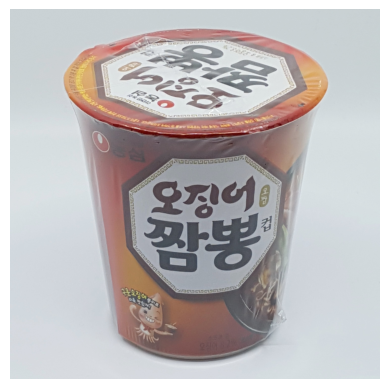

In [45]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = '/home/mmc/disk2/duck/cap/Valid/csv/new/noodle.csv'

# 데이터 불러오기
data = pd.read_csv(csv_file_path)

# 첫 번째 행의 'path' 열에서 이미지 경로 추출
image_path = data['path'].iloc[0]

# 이미지 불러오기
image = Image.open(image_path)

# 이미지 출력
plt.imshow(image)
plt.axis('off')  # 축을 표시하지 않음
plt.show()


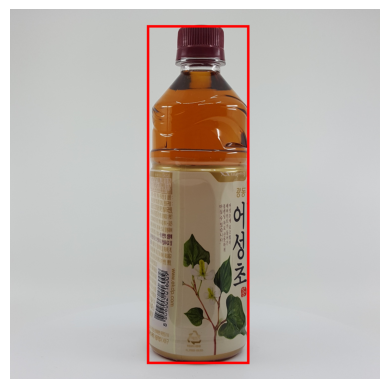

In [48]:
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = '/home/mmc/disk2/duck/cap/Train/csv/new/drink.csv'

# 데이터 불러오기
data = pd.read_csv(csv_file_path)

# 첫 번째 행의 정보 사용
row = data.iloc[0]

# 이미지 불러오기
image_path = row['path']
image = Image.open(image_path)

# 바운딩 박스 그리기
draw = ImageDraw.Draw(image)
bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
draw.rectangle(bbox, outline="red", width=20)

# 이미지 시각화
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()


In [67]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '/home/mmc/disk2/duck/cap/Valid/csv/new/noodle.csv'

# 데이터 불러오기
data = pd.read_csv(csv_file_path)

# 바운딩 박스의 중심 좌표 (x_center, y_center) 계산
data['x_center'] = (data['xmin'] + data['xmax']) / 2
data['y_center'] = (data['ymin'] + data['ymax']) / 2

# 바운딩 박스의 너비와 높이 (boundingbox_width, boundingbox_height) 계산
data['boundingbox_width'] = data['xmax'] - data['xmin']
data['boundingbox_height'] = data['ymax'] - data['ymin']

# 결과를 새로운 CSV 파일로 저장
data.to_csv('noodle.csv', index=False)


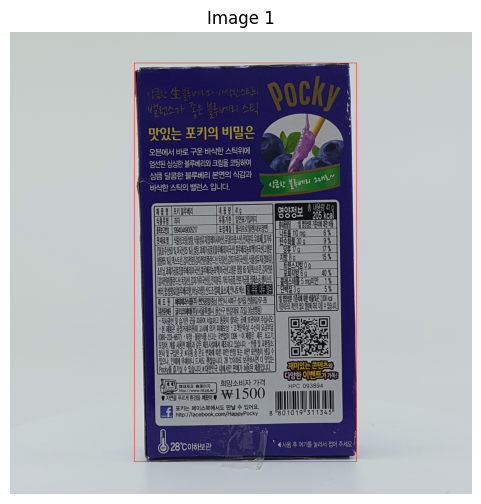

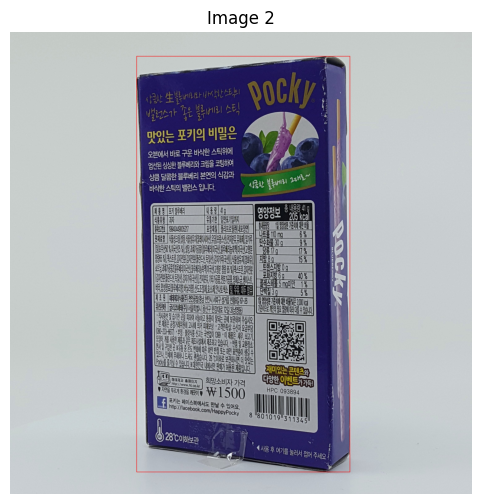

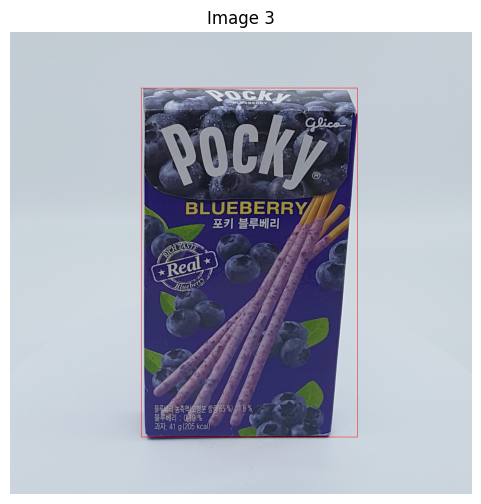

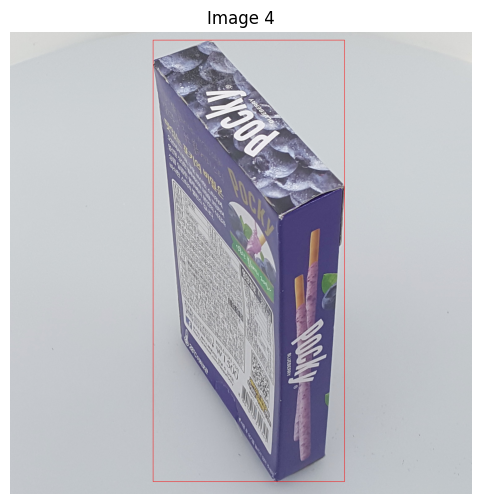

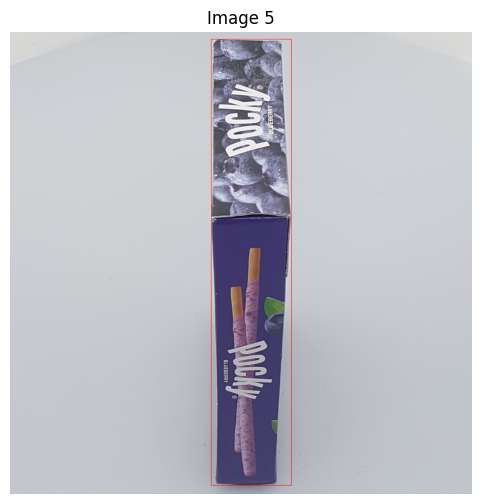

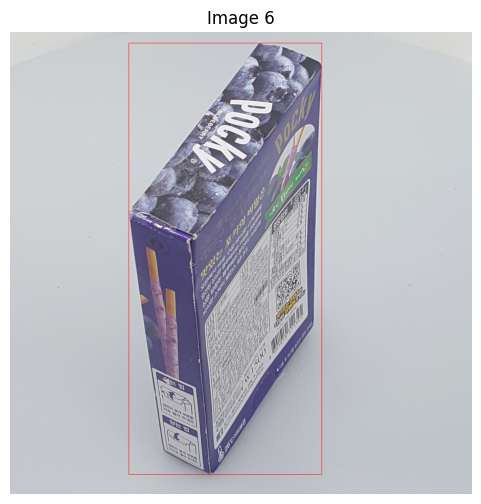

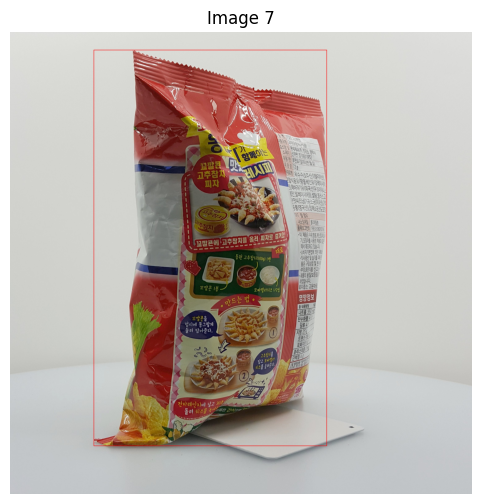

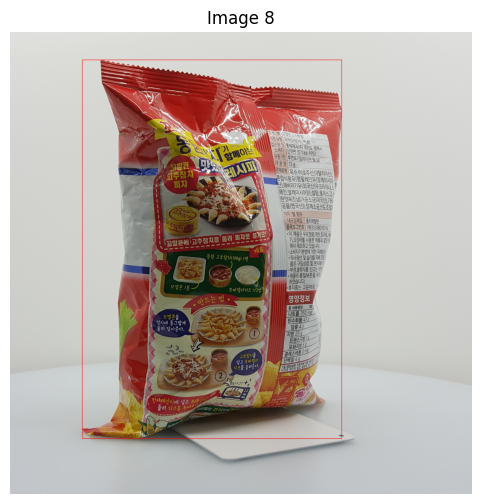

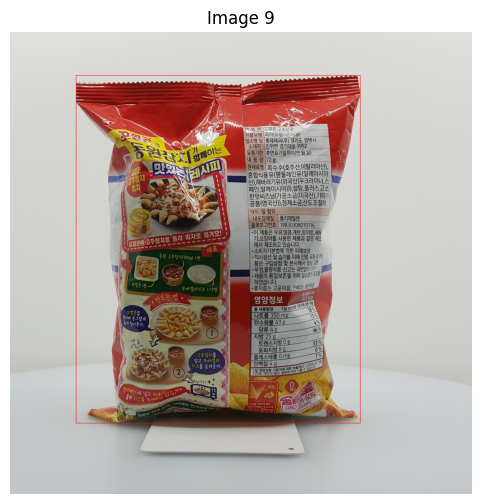

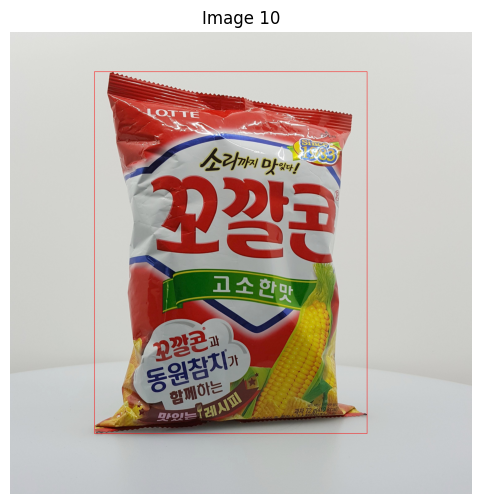

In [68]:
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = '/home/mmc/disk2/duck/cap/ultralytics/snack.csv'

# 데이터 불러오기
data = pd.read_csv(csv_file_path)

# 처음 10개 행에 대해 반복
for index, row in data.head(10).iterrows():
    # 이미지 불러오기
    image_path = row['path']
    image = Image.open(image_path)

    # 바운딩 박스 좌표 계산
    xmin = row['x_center'] - (row['boundingbox_width'] / 2)
    xmax = row['x_center'] + (row['boundingbox_width'] / 2)
    ymin = row['y_center'] - (row['boundingbox_height'] / 2)
    ymax = row['y_center'] + (row['boundingbox_height'] / 2)

    # 바운딩 박스 그리기
    draw = ImageDraw.Draw(image)
    draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)

    # 이미지 시각화
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Image {index + 1}")
    plt.axis('off')
    plt.show()


In [76]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '/home/mmc/disk2/duck/cap/Valid/csv/new/snack.csv'

# 데이터 불러오기
data = pd.read_csv(csv_file_path)

# 'img_prod_nm' 열을 기준으로 클래스 할당
data['class'], class_labels = pd.factorize(data['img_prod_nm'])

# 클래스와 img_prod_nm의 매핑 생성
class_to_name = pd.Series(data=class_labels, index=data['class'].unique())

# 매핑을 텍스트 파일로 저장
with open('class_snack.txt', 'w') as file:
    for class_id, img_prod_nm in class_to_name.items():
        file.write(f'Class {class_id}: {img_prod_nm}\n')

# 변경된 데이터를 새로운 CSV 파일로 저장
data.to_csv(csv_file_path, index=False)


In [82]:
import pandas as pd
import os

# CSV 파일 경로
csv_file_path = '/home/mmc/disk2/duck/cap/Valid/csv/new/snack.csv'

# 데이터 불러오기
data = pd.read_csv(csv_file_path)

# 각 행에 대해 반복
for index, row in data.iterrows():
    # 새 파일 경로 생성
    txt_file_path = row['path'].replace('/image/', '/labels/').replace('.jpg', '.txt')

    # 새 파일 경로에 해당하는 디렉토리가 없으면 생성
    os.makedirs(os.path.dirname(txt_file_path), exist_ok=True)

    # 파일에 쓸 내용 준비
    file_content = f"{row['class']} {row['x_center']} {row['y_center']} {row['boundingbox_width']} {row['boundingbox_height']}"

    # 파일에 내용 작성
    with open(txt_file_path, 'w') as file:
        file.write(file_content)


In [45]:
import os

# 이미지 파일의 확장자 목록
image_extensions = ['.jpg']

# 이미지 파일 개수를 저장할 변수
total_images = 0

# 주어진 디렉토리 경로
directory_path = '/home/mmc/disk2/duck/cap/Valid/drink/image'

# 모든 하위 폴더와 파일들을 순회
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if any(file.endswith(ext) for ext in image_extensions):
            total_images += 1

print(f"총 텍스트 파일 개수: {total_images}")


총 텍스트 파일 개수: 7910


In [42]:
import os
import shutil

# 이미지를 옮길 폴더 경로
base_folder = '/home/mmc/disk2/duck/cap/Valid/drink/labels'

# base_folder의 모든 하위 폴더를 순회합니다.
for root, dirs, files in os.walk(base_folder, topdown=False):  # 하위 폴더부터 시작
    for file in files:
        if root != base_folder:  # 상위 폴더가 아닌 하위 폴더에 있는 경우에만
            file_path = os.path.join(root, file)
            new_file_path = os.path.join(base_folder, file)

            # 파일을 상위 폴더로 이동
            shutil.move(file_path, new_file_path)

    # 현재 폴더(root)가 상위 폴더가 아니고, 파일이 없는 경우 폴더 삭제
    if root != base_folder and not os.listdir(root):
        os.rmdir(root)

print("이미지 이동 및 빈 폴더 삭제 작업이 완료되었습니다.")


이미지 이동 및 빈 폴더 삭제 작업이 완료되었습니다.


In [48]:
import os

# Define the paths to the directories
images_dir = "/home/mmc/disk2/duck/cap/Train/drink/image"
labels_dir = "/home/mmc/disk2/duck/cap/Train/drink/labels"

# Get the list of files in each directory
# Note: os.listdir() may not work here as this is a simulated environment and these directories may not exist
try:
    image_files = set(os.listdir(images_dir))
    label_files = set(os.listdir(labels_dir))
except FileNotFoundError as e:
    result = str(e)
else:
    # Remove file extensions and compare
    image_names = {os.path.splitext(file)[0] for file in image_files}
    label_names = {os.path.splitext(file)[0] for file in label_files}

    # Find files that are in one set but not the other
    missing_in_images = label_names - image_names
    missing_in_labels = image_names - label_names

    # Format the result
    result = {
        "이미지 폴더에 없는 레이블 파일": sorted(missing_in_images),
        "레이블 폴더에 없는 이미지 파일": sorted(missing_in_labels)
    }

result


{'이미지 폴더에 없는 레이블 파일': [],
 '레이블 폴더에 없는 이미지 파일': ['10001_60_s_1',
  '10001_60_s_10',
  '10001_60_s_11',
  '10001_60_s_12',
  '10001_60_s_13',
  '10001_60_s_14',
  '10001_60_s_15',
  '10001_60_s_16',
  '10001_60_s_2',
  '10001_60_s_20',
  '10001_60_s_21',
  '10001_60_s_22',
  '10001_60_s_23',
  '10001_60_s_24',
  '10001_60_s_3',
  '10001_60_s_4',
  '10001_유어스광동어성초500ml',
  '10005_30_s_4',
  '10024_0_s_2',
  '10024_30_s_3',
  '10025_0_s_21',
  '10033_30_s_23',
  '10039_30_s_10',
  '10040_60_s_16',
  '10041_30_s_7',
  '10041_30_s_8',
  '10041_30_s_9',
  '10046_60_s_24',
  '10047_60_m10',
  '10047_60_m13',
  '10047_60_m15',
  '10047_60_m16',
  '10047_60_m18',
  '10047_60_m19',
  '10047_60_m20',
  '10047_60_m21',
  '10047_60_m22',
  '10047_60_m23',
  '10047_60_m3',
  '10047_60_m4',
  '10047_60_m5',
  '10047_60_m6',
  '10047_60_m8',
  '10069_30_s_7',
  '10086_60_s_8',
  '10087_60_s_9',
  '15200_00_s_10',
  '15200_30_s_3',
  '15203_60_s_10',
  '15207_60_s_14',
  '20004_30_s_16',
  '20004_30_s_

In [61]:
import pandas as pd

def normalize_bounding_box(csv_file, width_col, height_col, x_center_col, y_center_col, bbox_width_col, bbox_height_col):
    try:
        # Read the CSV file
        data = pd.read_csv(csv_file)

        # Normalize the bounding box values
        data[x_center_col] = data[x_center_col] / data[width_col]
        data[y_center_col] = data[y_center_col] / data[height_col]
        data[bbox_width_col] = data[bbox_width_col] / data[width_col]
        data[bbox_height_col] = data[bbox_height_col] / data[height_col]
        
        corrected_path = '/home/mmc/disk2/duck/cap/data/noodle/val/images/'
        data['path'] = data['identifier'].apply(lambda x: corrected_path + x)

        # Save the modified DataFrame back to CSV
        data.to_csv(csv_file, index=False)

        return "Bounding box values normalized."
    except Exception as e:
        return str(e)

# Example usage
csv_file = "/home/mmc/disk2/duck/cap/data/csv/val/noodle.csv" # Replace with your actual CSV file path
normalize_bounding_box(csv_file, 'width', 'height', 'x_center', 'y_center', 'boundingbox_width', 'boundingbox_height')

"normalize_bounding_box 함수 제공 완료."


'normalize_bounding_box 함수 제공 완료.'

In [59]:
import pandas as pd

# CSV 파일 로드
file_path = '/home/mmc/disk2/duck/cap/data/csv/val/drink.csv'
data = pd.read_csv(file_path)



save_path = '/home/mmc/disk2/duck/cap/data/csv/val/drink.csv'

data.to_csv(save_path, index=False)


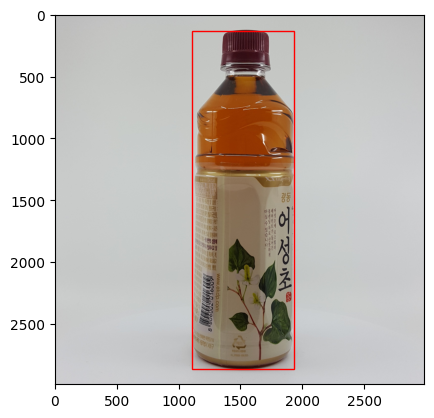

In [71]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd

# 이미지 위에 바운딩 박스를 그리는 함수
def draw_bounding_box(image_path, x_center, y_center, bbox_width, bbox_height):
    # 이미지 로드
    with Image.open(image_path) as img:
        fig, ax = plt.subplots()
        ax.imshow(img)

        # 이미지의 전체 크기 계산
        img_width, img_height = img.size

        # 바운딩 박스 좌표 계산
        xmin = int((x_center - bbox_width / 2) * img_width)
        xmax = int((x_center + bbox_width / 2) * img_width)
        ymin = int((y_center - bbox_height / 2) * img_height)
        ymax = int((y_center + bbox_height / 2) * img_height)

        # 바운딩 박스 그리기
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.show()

# CSV 파일 로드
data = pd.read_csv('/home/mmc/disk2/duck/cap/data/csv/train/drink.csv')


# 첫 번째 이미지를 예시로 사용
first_row = data.iloc[0]
image_path = first_row['path']
x_center, y_center, bbox_width, bbox_height = first_row[['x_center', 'y_center', 'boundingbox_width', 'boundingbox_height']]

# 바운딩 박스 그리기
draw_bounding_box(image_path, x_center, y_center, bbox_width, bbox_height)


In [77]:
import pandas as pd
import os

# CSV 파일 로드
data = pd.read_csv('/home/mmc/disk2/duck/cap/data/csv/val/drink.csv')

# 레이블을 저장할 폴더 경로 지정 (실제 경로로 수정하세요)
labels_folder = '/home/mmc/disk2/duck/cap/data/drink/val/labels/'

# 레이블 파일 생성
for index, row in data.iterrows():
    # 이미지 식별자에서 파일 이름 추출
    file_name = row['identifier'].split('.')[0] + '.txt'

    # 레이블 파일 경로
    label_file = os.path.join(labels_folder, file_name)

    # 레이블 파일 내용 (YOLO 포맷)
    label_content = f"{row['class']} {row['x_center']} {row['y_center']} {row['boundingbox_width']} {row['boundingbox_height']}"

    # 파일 쓰기
    with open(label_file, 'w') as file:
        file.write(label_content)
    
